In [1]:
from astropy.io import fits
import numpy as np

#### 打开，读取FITS文件

In [2]:
hdul = fits.open('glg_tte_b0_bn200716957_v00.fit')

open()函数可以有别的可选参数。默认只读。  
open()函数返回一个对象叫做 HDUList，这是一个HDU（[Header Data Unit](https://docs.astropy.org/en/stable/io/fits/api/hdus.html)）的list。  
HDU（[Header Data Unit](https://docs.astropy.org/en/stable/io/fits/api/hdus.html)）是FITS文件结构的最高级构件，HDU下包含了Header, data array, or table.  

这里应该有个数据文件介绍。。。 

In [3]:
hdul.info()

Filename: glg_tte_b0_bn200716957_v00.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  EBOUNDS       1 BinTableHDU     58   128R x 3C   [1I, 1E, 1E]   
  2  EVENTS        1 BinTableHDU     48   2537105R x 2C   [1D, 1I]   
  3  GTI           1 BinTableHDU     44   1R x 2C   [1D, 1D]   


用fv软件([FV下载地址](https://heasarc.gsfc.nasa.gov/docs/software/ftools/fv/))打开是这样的:  
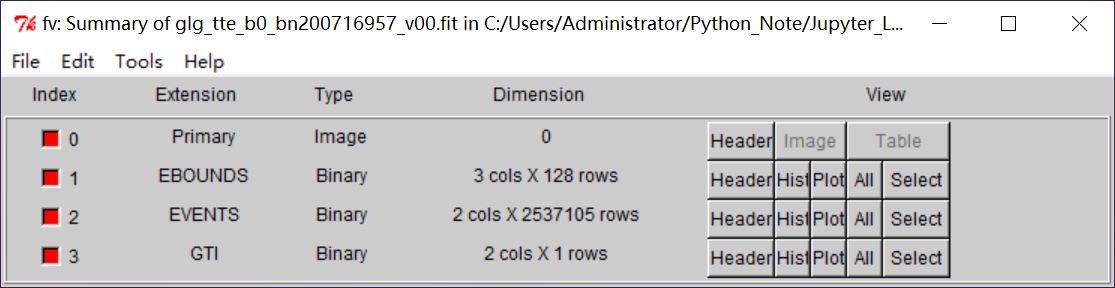

可通过hdul[0,...]调取每一个元素（HDU）,然后可以再用HDU.header(/data)调取每一个HDU的下级header/data数据。

In [4]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    0 / number of axes                                 
EXTEND  =                    T / Extensions are permitted                       
CHECKSUM= '2AFE37992ACE2799'   / checksum for the current HDU                   
DATASUM = '0       '           / checksum of the data records                   
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
CREATOR = 'MakeTriggerTte v1.5.15 (rev: 2e28477f)' / Software and version creati
FILETYPE= 'GBM PHOTON LIST'    / Name for this type of FITS file                
FILE-VER= '1.0.0   '           / Version of the format for this filetype        
DATATYPE= 'TTE'               / Name of the primary datatype making up this file
TELESCOP= 'GLAST   '        

FITS文件某个HDU的header可以理解为这个HDU的名片？  
这个‘名片’的每一行包含3个元素：keyword, value, comment。  
keyword 和 comment 必须字符串格式  
value 可以是字符串，整数，浮点数，布尔数（true/fause）

In [5]:
hdul[0].data

这里没有输出，应该是空值。

In [6]:
hdul[1].header

XTENSION= 'BINTABLE'           / marks beginning of new HDU                     
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                   10 / size of the n'th axis                          
NAXIS2  =                  128 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
TFIELDS =                    3 / Number of table fields                         
CHECKSUM= '9AYAD2Y598YAA8Y3'   / checksum for the current HDU                   
DATASUM = '2140818543'         / checksum of the data records                   
TFORM1  = '1I      '           / column data format                             
TTYPE1  = 'CHANNEL '           / label for field   1                            
TLMIN1  =                   

In [7]:
hdul[1].header['BITPIX']

8

In [8]:
hdul[1].header.comments['BITPIX']

'bits per data value'

In [9]:
hdul[1].data

FITS_rec([(  0,   113.24812,   216.70697),
          (  1,   216.70697,   250.77327),
          (  2,   250.77327,   284.6495 ),
          (  3,   284.6495 ,   318.34766),
          (  4,   318.34766,   351.87964),
          (  5,   351.87964,   385.25745),
          (  6,   385.25745,   418.49304),
          (  7,   418.49304,   451.5984 ),
          (  8,   451.5984 ,   484.58542),
          (  9,   484.58542,   517.46606),
          ( 10,   517.46606,   550.2524 ),
          ( 11,   550.2524 ,   582.95624),
          ( 12,   582.95624,   626.4539 ),
          ( 13,   626.4539 ,   669.8546 ),
          ( 14,   669.8546 ,   713.1867 ),
          ( 15,   713.1867 ,   756.47864),
          ( 16,   756.47864,   799.75867),
          ( 17,   799.75867,   843.0552 ),
          ( 18,   843.0552 ,   886.3965 ),
          ( 19,   886.3965 ,   929.811  ),
          ( 20,   929.811  ,   973.32697),
          ( 21,   973.32697,  1016.97284),
          ( 22,  1016.97284,  1060.777  ),
          (

对照软件打开的图形界面：  
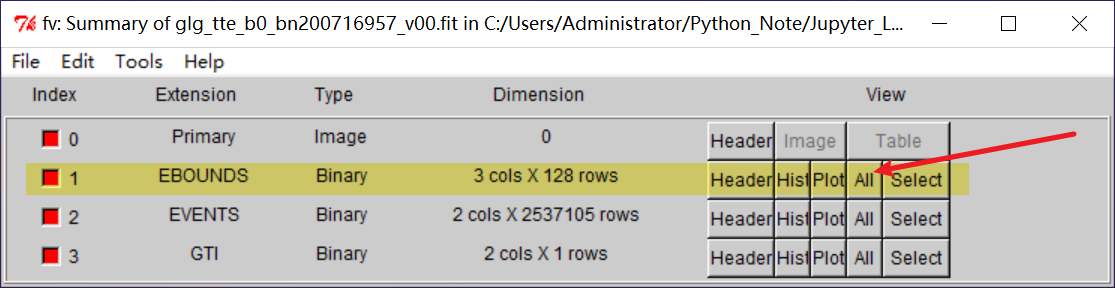      
对应hdul [1].data  
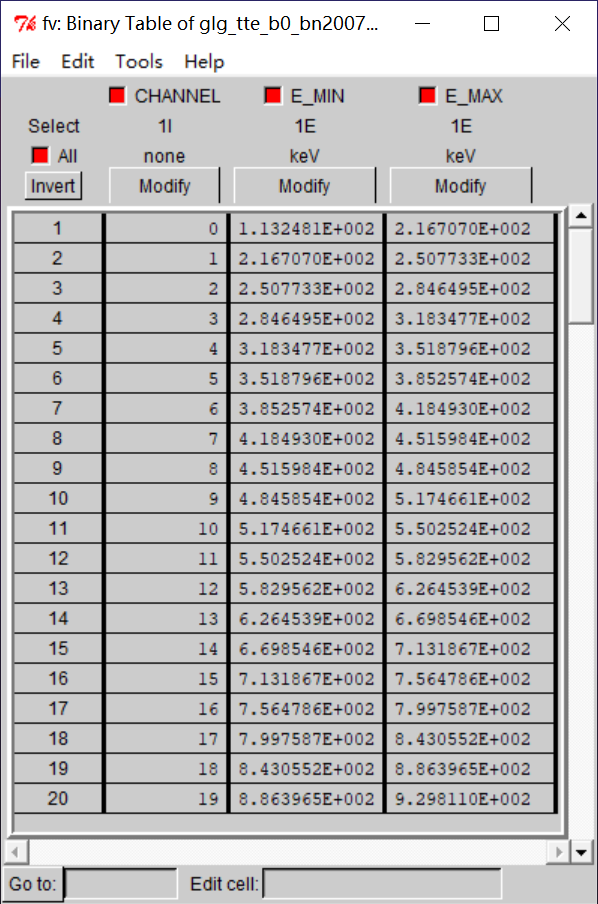      
hdul[1].data有128行，对应GBM探测器的128个能道（channel），每一行的E_MIN, E_MAX是对应能道的下边界，上边界。  

对应值的读取：

In [10]:
hdul[1].data[2,]

(2, 250.77327, 284.6495)

也可通过对应数据名称读取：

In [11]:
hdul[1].data['CHANNEL']

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], dtype=int16)

In [12]:
hdul[1].data['E_MIN']

array([  113.24812,   216.70697,   250.77327,   284.6495 ,   318.34766,
         351.87964,   385.25745,   418.49304,   451.5984 ,   484.58542,
         517.46606,   550.2524 ,   582.95624,   626.4539 ,   669.8546 ,
         713.1867 ,   756.47864,   799.75867,   843.0552 ,   886.3965 ,
         929.811  ,   973.32697,  1016.97284,  1060.777  ,  1115.7977 ,
        1171.1654 ,  1226.9353 ,  1283.1628 ,  1339.9033 ,  1397.2122 ,
        1455.1398 ,  1513.5823 ,  1583.9895 ,  1654.2152 ,  1723.7474 ,
        1792.0748 ,  1858.6855 ,  1923.0681 ,  1984.7217 ,  2053.325  ,
        2119.6519 ,  2185.1575 ,  2251.204  ,  2318.2578 ,  2386.2793 ,
        2465.1445 ,  2545.1465 ,  2626.2173 ,  2708.289  ,  2791.2942 ,
        2875.1646 ,  2970.469  ,  3066.686  ,  3163.7197 ,  3261.4731 ,
        3370.8147 ,  3480.7935 ,  3591.2769 ,  3702.1323 ,  3824.345  ,
        3946.6726 ,  4069.0034 ,  4191.3286 ,  4324.767  ,  4458.199  ,
        4591.624  ,  4736.16   ,  4880.688  ,  5025.2085 ,  5180

小结：  
通过 astropy.io.fits.open() 打开FITS文件，返回hdul。    
通过 hdul[#].header/data调取某个HDU的header/data数据。
HDU至少（一般？）有Primary, 一般都还有别的extension，比如此文件就还有EBOUNDS, EVENTS, GTI。  
通过 hdul[#].data['...'] 调用相关数据，返回一个array

#### 修改FITS文件

添加header

In [13]:
hdul[1].header['TEST']=(100,'student')

In [14]:
hdul[1].header

XTENSION= 'BINTABLE'           / marks beginning of new HDU                     
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                   10 / size of the n'th axis                          
NAXIS2  =                  128 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
TFIELDS =                    3 / Number of table fields                         
CHECKSUM= '9AYAD2Y598YAA8Y3'   / checksum for the current HDU                   
DATASUM = '2140818543'         / checksum of the data records                   
TFORM1  = '1I      '           / column data format                             
TTYPE1  = 'CHANNEL '           / label for field   1                            
TLMIN1  =                   

可以看到最后一行有刚添加的信息。

In [15]:
hdul['EBOUNDS'].data
# or hdul[1].data

FITS_rec([(  0,   113.24812,   216.70697),
          (  1,   216.70697,   250.77327),
          (  2,   250.77327,   284.6495 ),
          (  3,   284.6495 ,   318.34766),
          (  4,   318.34766,   351.87964),
          (  5,   351.87964,   385.25745),
          (  6,   385.25745,   418.49304),
          (  7,   418.49304,   451.5984 ),
          (  8,   451.5984 ,   484.58542),
          (  9,   484.58542,   517.46606),
          ( 10,   517.46606,   550.2524 ),
          ( 11,   550.2524 ,   582.95624),
          ( 12,   582.95624,   626.4539 ),
          ( 13,   626.4539 ,   669.8546 ),
          ( 14,   669.8546 ,   713.1867 ),
          ( 15,   713.1867 ,   756.47864),
          ( 16,   756.47864,   799.75867),
          ( 17,   799.75867,   843.0552 ),
          ( 18,   843.0552 ,   886.3965 ),
          ( 19,   886.3965 ,   929.811  ),
          ( 20,   929.811  ,   973.32697),
          ( 21,   973.32697,  1016.97284),
          ( 22,  1016.97284,  1060.777  ),
          (

In [16]:
#type(hdul['EBOUNDS'].data)

In [17]:
hdul['EBOUNDS'].data[2][1]

250.77327

In [18]:
#hdul['EBOUNDS'].data[10:20]

In [19]:
cols = hdul[1].columns
cols.info()
# or hdul[1].columns

name:
    ['CHANNEL', 'E_MIN', 'E_MAX']
format:
    ['1I', '1E', '1E']
unit:
    ['none', 'keV', 'keV']
null:
    ['', '', '']
bscale:
    ['', '', '']
bzero:
    ['', '', '']
disp:
    ['', '', '']
start:
    ['', '', '']
dim:
    ['', '', '']
coord_type:
    ['', '', '']
coord_unit:
    ['', '', '']
coord_ref_point:
    ['', '', '']
coord_ref_value:
    ['', '', '']
coord_inc:
    ['', '', '']
time_ref_pos:
    ['', '', '']


可见fits文件包含了许多信息

In [20]:
hdul[1].columns.names

['CHANNEL', 'E_MIN', 'E_MAX']

In [21]:
hdul[1].data['E_MAX']

array([  216.70697,   250.77327,   284.6495 ,   318.34766,   351.87964,
         385.25745,   418.49304,   451.5984 ,   484.58542,   517.46606,
         550.2524 ,   582.95624,   626.4539 ,   669.8546 ,   713.1867 ,
         756.47864,   799.75867,   843.0552 ,   886.3965 ,   929.811  ,
         973.32697,  1016.97284,  1060.777  ,  1115.7977 ,  1171.1654 ,
        1226.9353 ,  1283.1628 ,  1339.9033 ,  1397.2122 ,  1455.1398 ,
        1513.5823 ,  1583.9895 ,  1654.2152 ,  1723.7474 ,  1792.0748 ,
        1858.6855 ,  1923.0681 ,  1984.7217 ,  2053.325  ,  2119.6519 ,
        2185.1575 ,  2251.204  ,  2318.2578 ,  2386.2793 ,  2465.1445 ,
        2545.1465 ,  2626.2173 ,  2708.289  ,  2791.2942 ,  2875.1646 ,
        2970.469  ,  3066.686  ,  3163.7197 ,  3261.4731 ,  3370.8147 ,
        3480.7935 ,  3591.2769 ,  3702.1323 ,  3824.345  ,  3946.6726 ,
        4069.0034 ,  4191.3286 ,  4324.767  ,  4458.199  ,  4591.624  ,
        4736.16   ,  4880.688  ,  5025.2085 ,  5180.837  ,  5336

In [22]:
hdul[1].data['E_MAX'][:] = 0
hdul[1].data['E_MAX']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
hdul.writeto('test1.fits')

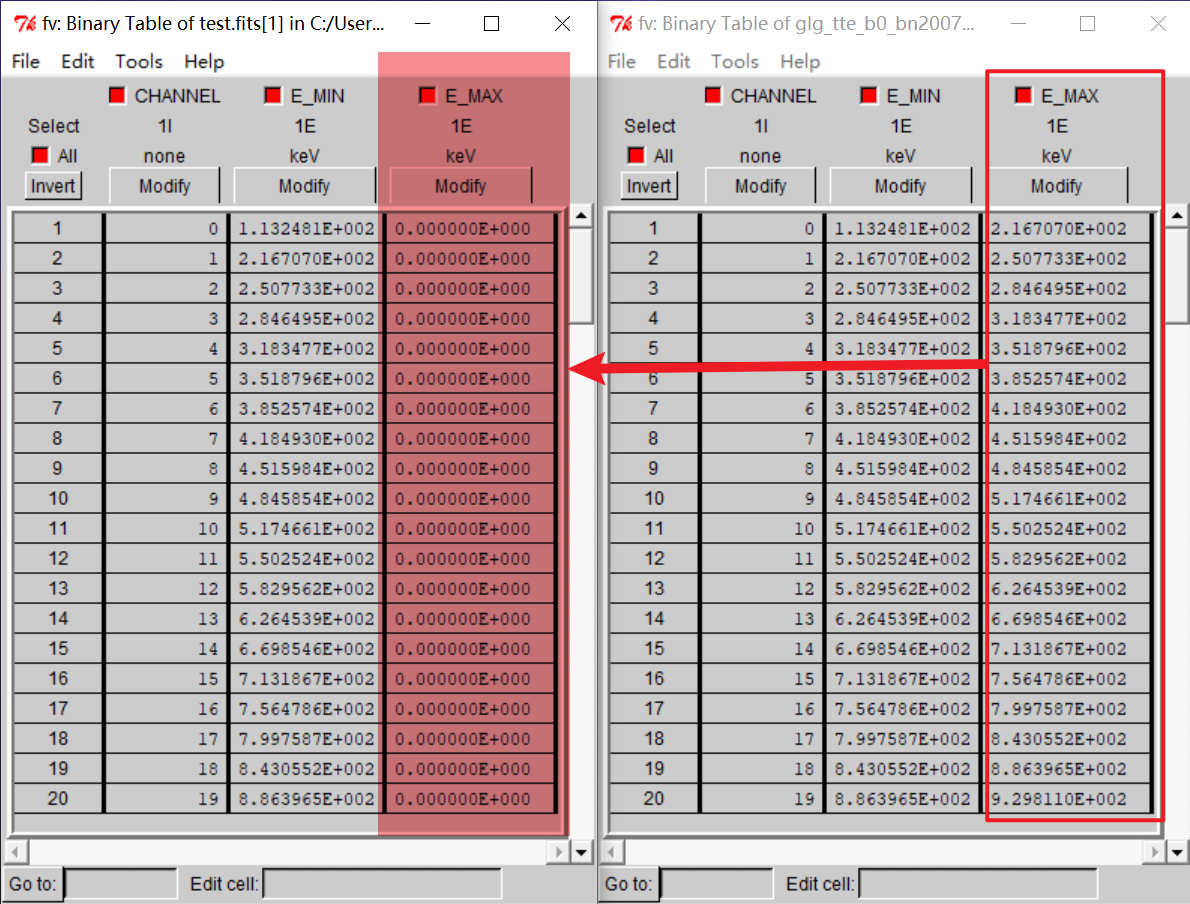

#### 创建新的FITS文件, 修改已有的FIT文件

##### Creating a New Image File

In [24]:
n = np.arange(100)
hduuu = fits.PrimaryHDU(n)
#hdul = fits.HDUList([hduuu])
#hduuu.info()
hduuu.writeto('newl1.fits')

##### Creating a New Table File

In [25]:
from astropy.table import Table
t = Table([[1, 2], [4, 5], [7, 8]], names=('a', 'b', 'c'))
t.write('table11.fits', format='fits')

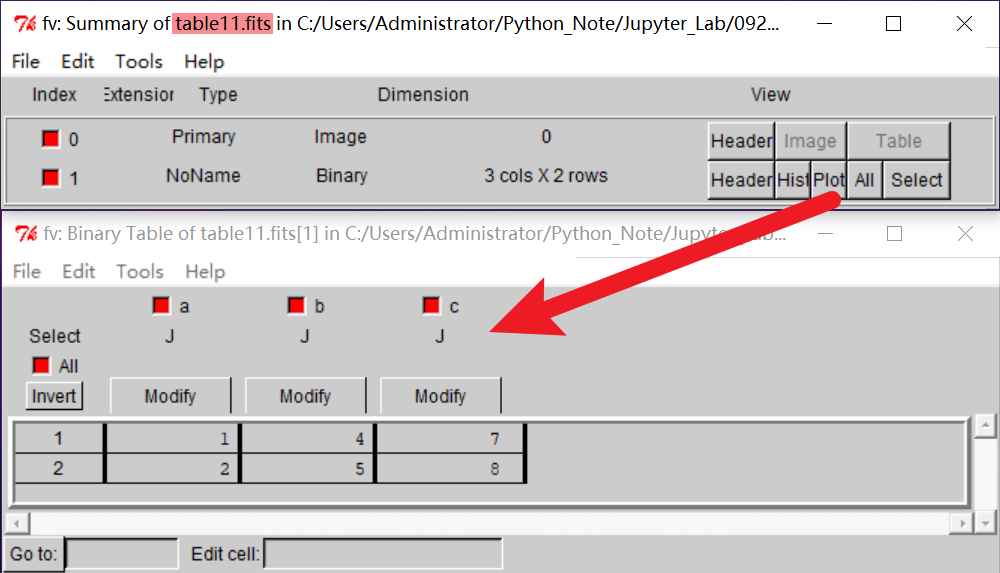

或者

In [26]:
c1 = fits.Column(name='a', array=np.array([1, 2]), format='K')
c2 = fits.Column(name='b', array=np.array([4, 5]), format='K')
c3 = fits.Column(name='c', array=np.array([7, 8]), format='K')
t = fits.BinTableHDU.from_columns([c1, c2, c3])
t.writeto('table2.fits')

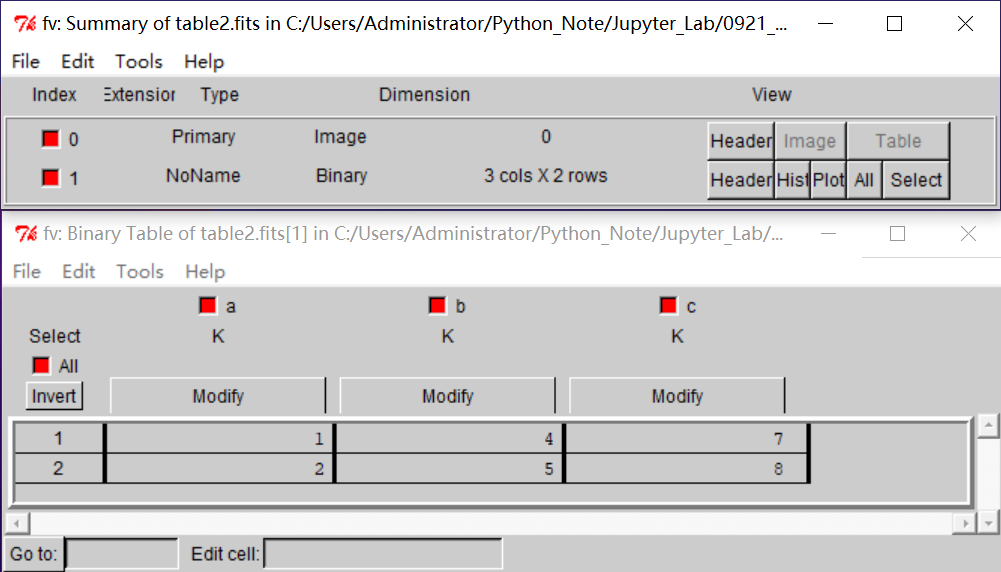

In [27]:
a1 = np.array(['NGC1001', 'NGC1002', 'NGC1003'])
a2 = np.array([11.1, 12.3, 15.2])
col1 = fits.Column(name='target', format='20A', array=a1)
col2 = fits.Column(name='V_mag', format='E', array=a2)

ColDefs:column-definitions

In [28]:
cols = fits.ColDefs([col1, col2])
hdu = fits.BinTableHDU.from_columns(cols)

In [29]:
hdu.writeto('table3.fits')

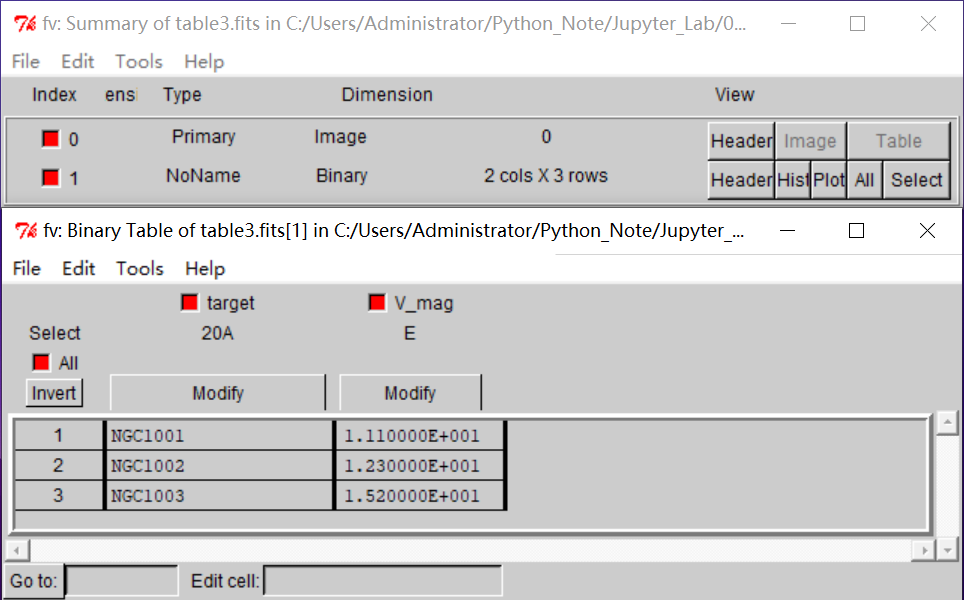

##### Creating a File with Multiple Extensions  
To create a file with multiple extensions we need to create extension HDUs and append them to an HDUList.

In [30]:
n = np.ones((3, 3))
n2 = np.ones((100, 100))
n3 = np.ones((10, 10, 10))
primary_hdu = fits.PrimaryHDU(n)
image_hdu = fits.ImageHDU(n2)
image_hdu2 = fits.ImageHDU(n3)
c1 = fits.Column(name='a', array=np.array([1, 2]), format='K')
c2 = fits.Column(name='b', array=np.array([4, 5]), format='K')
c3 = fits.Column(name='c', array=np.array([7, 8]), format='K')
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3])
hdul = fits.HDUList([primary_hdu, image_hdu, table_hdu])
hdul.append(image_hdu2)

In [31]:
hdul.writeto('multi.fits')

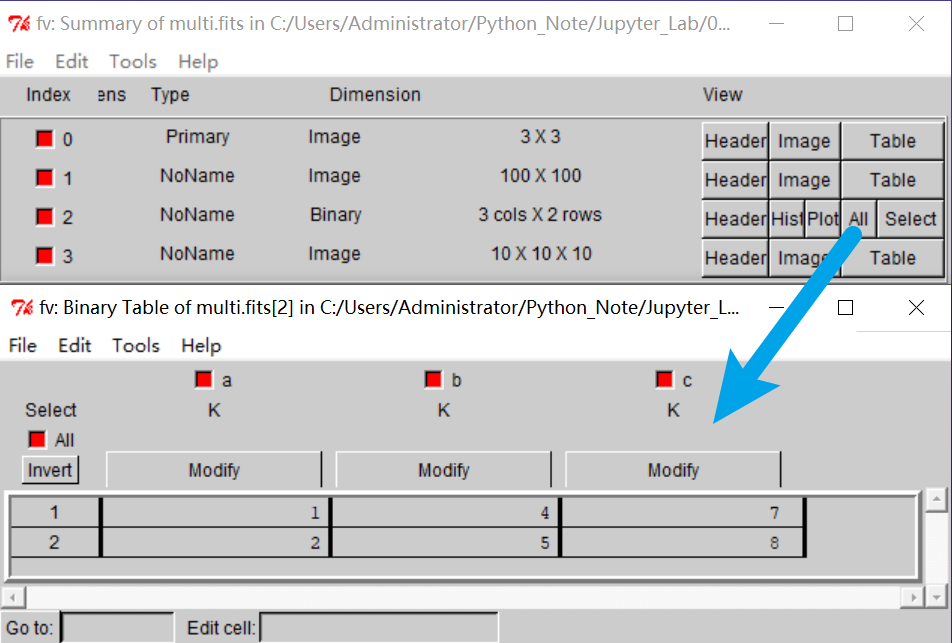

修改已有的FITS文件

In [32]:
hdul = fits.open('glg_tte_b0_bn200716957_v00.fit')
hdul.info()

Filename: glg_tte_b0_bn200716957_v00.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  EBOUNDS       1 BinTableHDU     58   128R x 3C   [1I, 1E, 1E]   
  2  EVENTS        1 BinTableHDU     48   2537105R x 2C   [1D, 1I]   
  3  GTI           1 BinTableHDU     44   1R x 2C   [1D, 1D]   


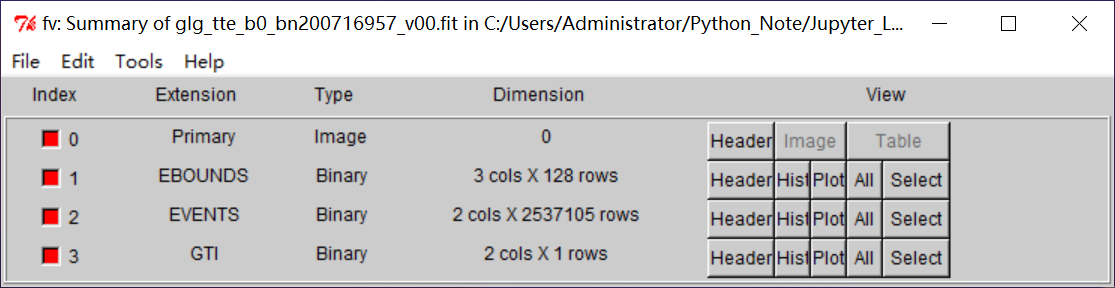

In [33]:
c1 = fits.Column(name='TIMES', array=np.ones(8), format='K')
c2 = fits.Column(name='RATES', array=np.ones(8), format='K')
c3 = fits.Column(name='ERRORS', array=np.ones(8), format='K')

In [34]:
table_hdu = fits.BinTableHDU.from_columns([c1, c2, c3])

In [35]:
hdul.append(table_hdu)

In [36]:
hdul.writeto('append.fits')

In [37]:
hdul.info()

Filename: glg_tte_b0_bn200716957_v00.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  EBOUNDS       1 BinTableHDU     58   128R x 3C   [1I, 1E, 1E]   
  2  EVENTS        1 BinTableHDU     48   2537105R x 2C   [1D, 1I]   
  3  GTI           1 BinTableHDU     44   1R x 2C   [1D, 1D]   
  4                1 BinTableHDU     14   8R x 3C   ['K', 'K', 'K']   


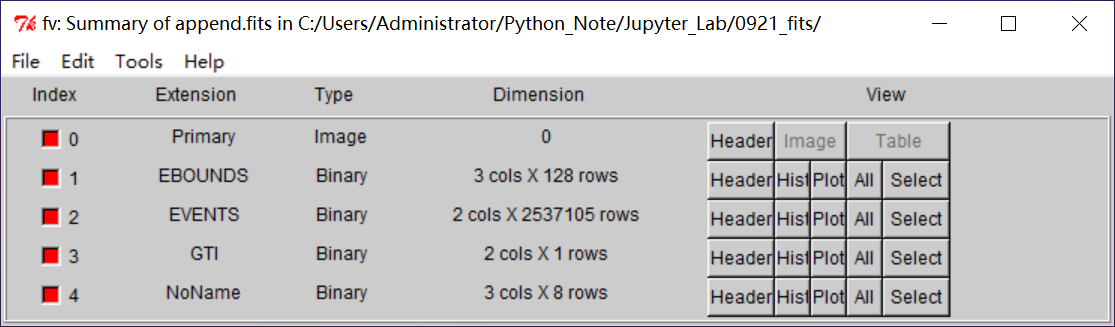
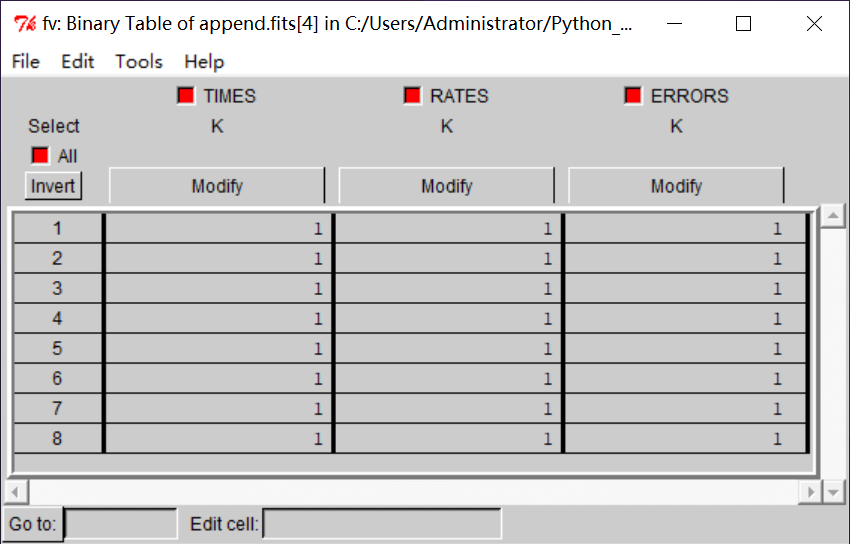

In [38]:
hdul[4].data['TIMES']

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)